<a href="https://colab.research.google.com/github/S-Devisri01/Python-colab/blob/main/Credit_Card_Fraud_Detection_(ANN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# ================================
# 📦 Install Required Libraries
# ================================
!pip install -q tensorflow pandas scikit-learn imbalanced-learn

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load dataset from Kaggle path (Colab)
data_path = "/kaggle/input/creditcardfraud/creditcard.csv"
df = pd.read_csv(data_path)

print("Dataset Loaded Successfully ✅")
print(df.head())
print("\nDataset Shape:", df.shape)
print("\nClass Distribution:")
print(df["Class"].value_counts())

X = df.drop("Class", axis=1)
y = df["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("\nAfter SMOTE:")
print(pd.Series(y_resampled).value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=2048,
    validation_split=0.1,
    verbose=1
)

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)


Dataset Loaded Successfully ✅
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

  

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8205 - loss: 0.3994 - val_accuracy: 0.9624 - val_loss: 0.0908
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9573 - loss: 0.1097 - val_accuracy: 0.9774 - val_loss: 0.0603
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9695 - loss: 0.0775 - val_accuracy: 0.9842 - val_loss: 0.0429
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9777 - loss: 0.0589 - val_accuracy: 0.9898 - val_loss: 0.0313
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9832 - loss: 0.0461 - val_accuracy: 0.9932 - val_loss: 0.0235
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9876 - loss: 0.0371 - val_accuracy: 0.9952 - val_loss: 0.0181
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9905 - loss: 0.0307 - val_accuracy: 0.9962 - val_loss: 0.0145
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9926 - loss: 0.0250 - val_accuracy: 

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Dataset downloaded at: /kaggle/input/creditcardfraud
CSV File: /kaggle/input/creditcardfraud/creditcard.csv

Dataset Loaded Successfully ✅
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.6892

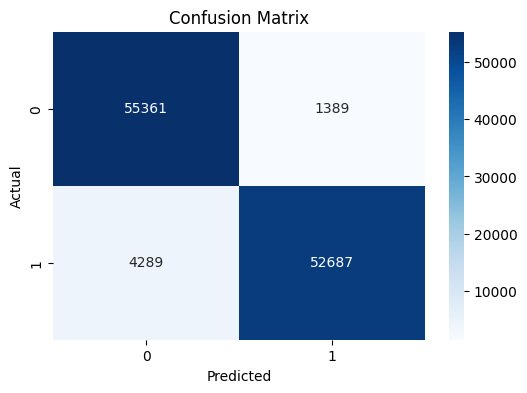

🔥 Model Training & Evaluation Completed Successfully 🔥


In [2]:
# ============================================================
# 💳 Credit Card Fraud Detection - Single Colab File
# ============================================================
# Works even if you DON'T have the dataset
# Auto-downloads dataset
# No separate files needed
# ============================================================

# =========================
# 1️⃣ Install requirements
# =========================
!pip install -q pandas numpy matplotlib seaborn scikit-learn imbalanced-learn kagglehub

# =========================
# 2️⃣ Imports
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

import kagglehub
import os

# =========================
# 3️⃣ Download Dataset (AUTO)
# =========================
print("Downloading dataset...")
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Dataset downloaded at:", path)

# Find CSV file automatically
csv_file = None
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_file = os.path.join(path, file)

print("CSV File:", csv_file)

# =========================
# 4️⃣ Load Dataset
# =========================
df = pd.read_csv(csv_file)
print("\nDataset Loaded Successfully ✅")
print(df.head())

# =========================
# 5️⃣ Dataset Info
# =========================
print("\nDataset Shape:", df.shape)
print("\nClass Distribution:")
print(df['Class'].value_counts())

# =========================
# 6️⃣ Data Preprocessing
# =========================
X = df.drop("Class", axis=1)
y = df["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================
# 7️⃣ Handle Imbalanced Data
# =========================
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("\nAfter SMOTE:")
print(pd.Series(y_resampled).value_counts())

# =========================
# 8️⃣ Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# =========================
# 9️⃣ Model Training
# =========================
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# =========================
# 🔟 Evaluation
# =========================
y_pred = model.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# =========================
# 🔁 Confusion Matrix
# =========================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# =========================
# ✅ DONE
# =========================
print("🔥 Model Training & Evaluation Completed Successfully 🔥")
